# 1D Convection diffusion equation (HYBRID SCHEME)

$$\frac{d}{d x}\left(\rho u\phi \right)=\frac{d}{d x}\left(\Gamma \frac{d \phi}{d x}\right)$$


##### Hybrid Schemes
$|Pe|<2$-Central Difference
$|Pe|\ge2$- Upwind scheme and Neg. diffusion 


Solution:
$$T_P=\frac{(a_E T_E+a_W T_w)}{a_P}$$

where,

$a_W=max(F_w,(D+F_w/2.0),0)$

$a_E=max(-F_e,(D_e-F_e/2.0),0)$

$a_P=a_E+a_W+F_e-F_w$

$D_e=\Gamma_e/dx$

$D_w=\Gamma_w/dx$

$F_e=\rho_e u_e$

$F_w=\rho_w u_w$



Boundary Conditions:
                  
$\phi(x=0)=1$, $\phi(x=Lx)=0$

Domain: $Lx=1$ m

velocity: $u_e=u_w=u=5$ m/s (Because at this value the Peclet Number is 1)

Peclet Number:

$Pe=\frac{\rho u h}{\Gamma}$

Density: $\rho_e=\rho_w=\rho=1$ kg/m$^3$

Diffusion coefficient: $\Gamma_e=\Gamma_w=\Gamma=0.01$ kg/m-s




Peclet Number=  0.39999999999999997
Final iteration=  389


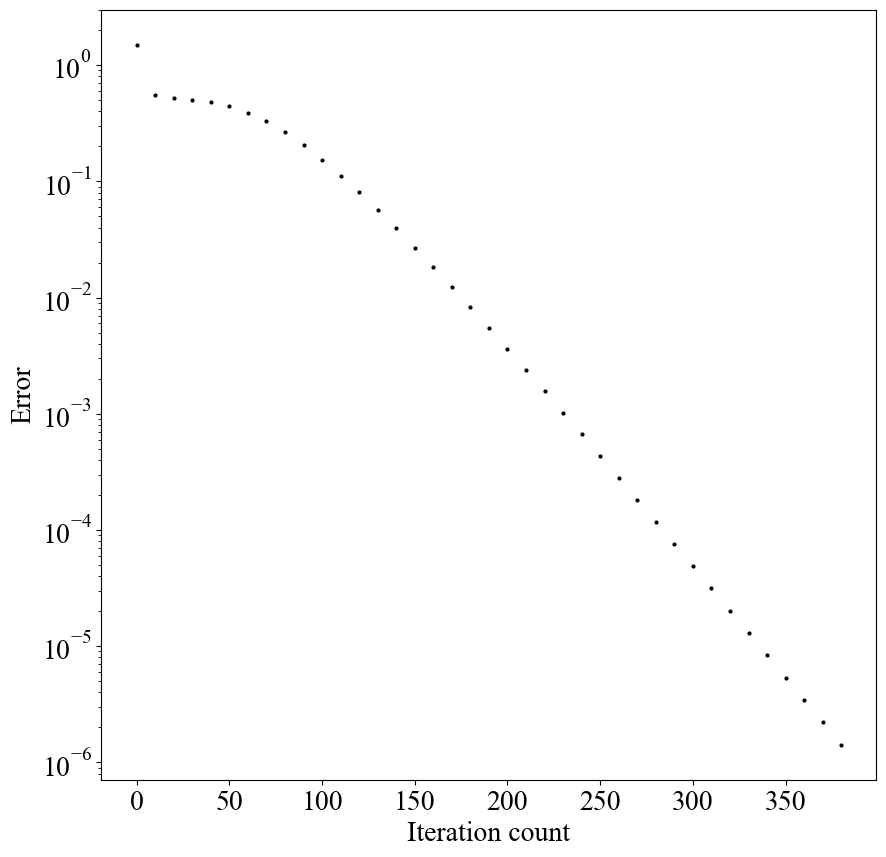

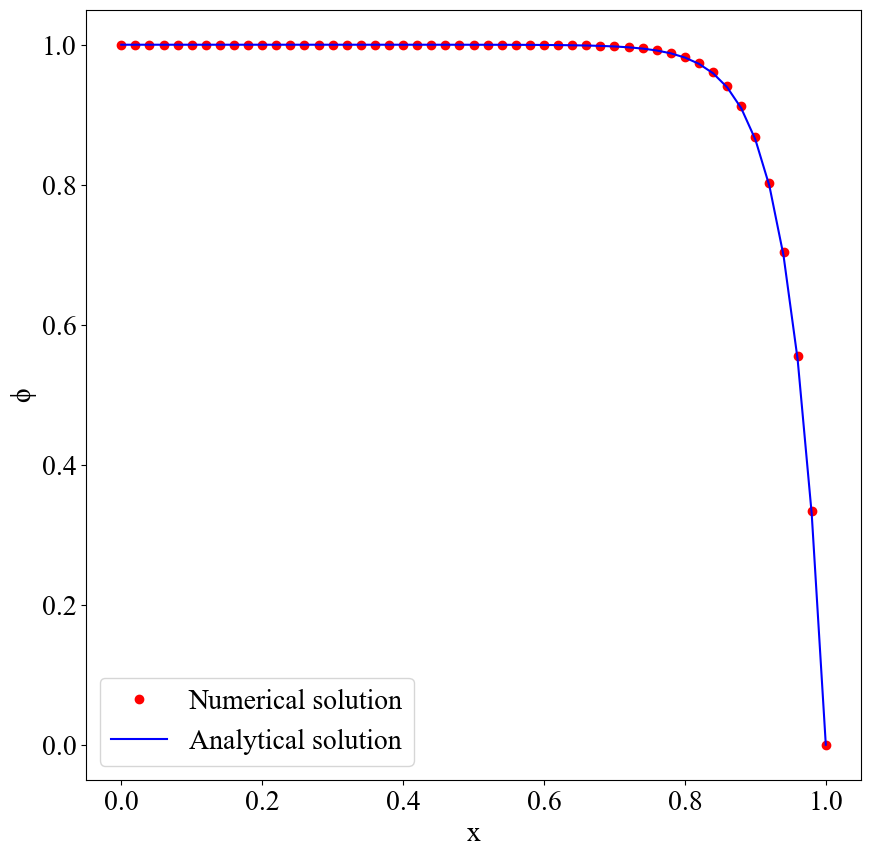

In [11]:
from numpy import *
from pylab import *
font = {'family' : 'Times New Roman','size'   : 20}
rc('font', **font)

# Function for Peclet number
#```````````````````````````
def Peclet(ρ,u,x,Γ):
    return ρ*u*x/Γ


# Physical Domain
#`````````````````
Lx=float64(1.0)

# Number of nodes
#`````````````````
nx=51

# dimension of FV Cell
#`````````````````````
dx=float64(Lx/(nx-1))

# Mesh/Grid Creating
#````````````````````
x=linspace(0,1,nx)

# Material, flow and Grid property (Assumed to be uniform)
#``````````````````````````````````````````````````````````
u_e=float64(2)
u_w=float64(2)
Γ_e=float64(0.1)
Γ_w=float64(0.1)
ρ_e=float64(1.0)
ρ_w=float64(1.0)


#Mass flow rate per unit area and Diffusion conductance
#```````````````````````````````````````````````````````

F_e=ρ_e*u_e
F_w=ρ_w*u_w
D_e=Γ_e/dx
D_w=Γ_w/dx

# HYBRID SCHEME
#```````````````
a_W=max(F_w,(D_w+F_w/2.0),0)
a_E=max(-F_e,(D_e-F_e/2.0),0)
a_P=a_E+a_W+F_e-F_w


# Peclet number
#````````````````
Pe=Peclet(ρ_e,u_e,dx,Γ_e)
print('Peclet Number= ',Pe)


# Initial Guess and array creation
#``````````````````````````````````
ϕ=zeros(nx)

# Boundary conditions
#`````````````````````
ϕ[0]=1.0
ϕ[-1]=0


# Copying old to new array for comparison and updation
#``````````````````````````````````````````````````````
ϕ_new=ϕ.copy()


# Solving governing equation for the interior cells
#```````````````````````````````````````````````````
count=0
ϵ=1.E-6
error=1
while error>ϵ:
    for i in range(1,nx-1):
        ϕ_new[i]=(a_E*ϕ_new[i+1]+a_W*ϕ_new[i-1])/a_P 
        
    # Evaluation error for current iteration
    #````````````````````````````````````````
    error=sum(abs(ϕ_new-ϕ))

    
    # Plotting error
    #```````````````
    figure(10,figsize=(10,10))
    if count%10==0:
        semilogy(count,error,'k-o',markersize=2)
        xlabel('Iteration count')
        ylabel('Error')

    
    # Count incrementing
    #```````````````````
    count=count+1
    
    
    # Updating ϕ 
    #````````````
    ϕ=ϕ_new.copy()

print('Final iteration= ',count)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# Plotting and comparing numerical result with exact solution #
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# Exact solution
Pe_x=Peclet(ρ_e,u_e,x,Γ_e)
Pe_L=Pe_x[-1]
exact=ϕ[0]+(ϕ[-1]-ϕ[0])*(exp(Pe_x)-1)/(exp(Pe_L)-1)

figure(20,figsize=(10,10))
plot(x,ϕ,'ro',label='Numerical solution')
plot(x,exact,'b-',label='Analytical solution')
xlabel('x')
ylabel('ϕ')
legend()
show()